#### About Dataset
    Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. 
    It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. 
    Eventually, providing the city with a stable supply of rental bikes becomes a major concern. 
    The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.
    Data used include weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information
    
### Expected Outcome
    As it is a Regression problem the expected outcome will vary each day. 
    The expected outcome depends on features like Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall.
    
### Objective
    The objective is to calculate the number of bikes required each hour in order to provide a smooth and stable supply of rental bikes

#### Starting with Importing all the Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

#### Load Dataset

In [2]:
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape')

#### Visualization of data

In [3]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


#### Getting the shape of the data 

In [4]:
df.shape

(8760, 14)

#### columns of the dataset

In [5]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [6]:
df = df.rename(columns={"Date": "Date", "Rented Bike Count": "Rented_Bike_Count", "Hour": "Hour", "Temperature(°C)":"Temperature", "Humidity(%)": "Humidity","Wind speed (m/s)": "Wind_speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"Dew_point_temperature","Solar Radiation (MJ/m2)":"Solar_Radiation","Rainfall(mm)":"Rainfall","Snowfall (cm)":"Snowfall","Seasons":"Seasons","Functioning Day":"Functioning_Day","Holiday":"Holiday"}, errors="raise")

In [7]:
df.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented_Bike_Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind_speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew_point_temperature  8760 non-null   float64
 8   Solar_Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning_Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

#### To get all the information about all the features

In [9]:
df.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

#### To get all the details

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rented_Bike_Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature,8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity,8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind_speed,8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility,8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew_point_temperature,8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar_Radiation,8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall,8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall,8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [11]:
df.head(2)

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [12]:
df.isnull().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

#### Collecting the Date, month and year details from the Date column

In [13]:
df["date"] = df["Date"].str.split("/").str[0]
df["month"] = df["Date"].str.split("/").str[1]
df["year"] = df["Date"].str.split("/").str[2]

#### Dropping the Date Column

In [14]:
df = df.drop(["Date"],axis =1)

In [15]:
df.head(2)

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,date,month,year
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,01,12,2017


#### Unique values of each features in the Dataset

In [16]:
for item in df.columns:
    print(item, ": " )
    print(df[item].unique())
    print(df[item].value_counts())
    print("************************************************")

Rented_Bike_Count : 
[ 254  204  173 ... 1538  804  595]
0       295
122      19
223      19
262      19
103      18
       ... 
2379      1
1589      1
1597      1
1605      1
2047      1
Name: Rented_Bike_Count, Length: 2166, dtype: int64
************************************************
Hour : 
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
23    365
15    365
8     365
16    365
1     365
9     365
17    365
2     365
10    365
18    365
3     365
11    365
19    365
4     365
12    365
20    365
5     365
13    365
21    365
6     365
14    365
22    365
7     365
0     365
Name: Hour, dtype: int64
************************************************
Temperature : 
[ -5.2  -5.5  -6.   -6.2  -6.4  -6.6  -7.4  -7.6  -6.5  -3.5  -0.5   1.7
   2.4   3.    2.1   1.2   0.8   0.6   0.   -0.3  -0.8  -0.9  -1.3  -1.8
  -2.2  -2.9  -3.8  -4.   -4.3  -4.4  -4.2  -0.4   1.9   4.3   6.    7.3
   7.6   6.4   5.5   5.    4.6   4.1   3.5   4.    3.9   3.3   3.4   3.1
   3.2 

#### Converting the data types of "date", "month" and "year" columns to "int" datatype

In [17]:
df['date'] = df['date'].astype('int')
df['month'] = df['month'].astype('int')
df['year'] = df['year'].astype('int')

Text(0.5, 1.0, 'Rented_Bike_Count vs month')

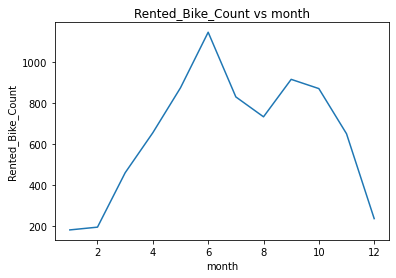

In [18]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

df.groupby('month')['Rented_Bike_Count'].median().plot()
plt.xlabel('month')
plt.ylabel('Rented_Bike_Count')
plt.title("Rented_Bike_Count vs month")

In [19]:
df = pd.get_dummies(df, drop_first = True)

In [20]:
df = df.rename(columns={"Holiday_No Holiday":"Holiday_No_Holiday"}, errors="raise")

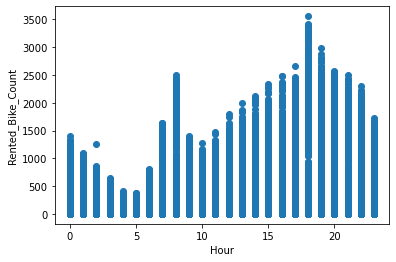

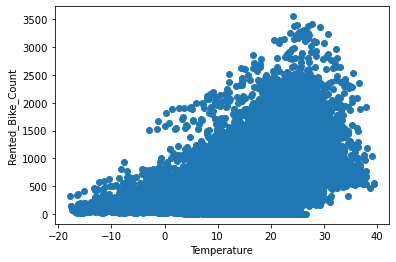

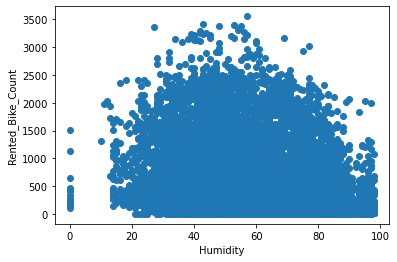

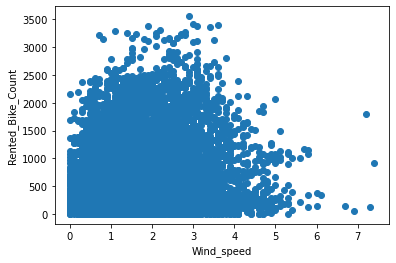

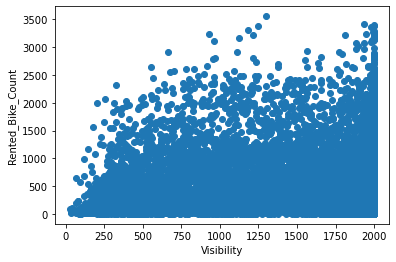

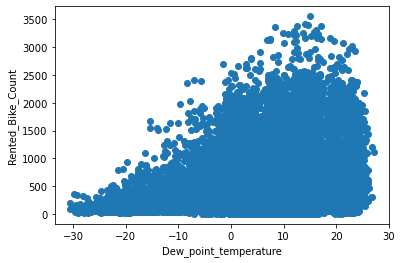

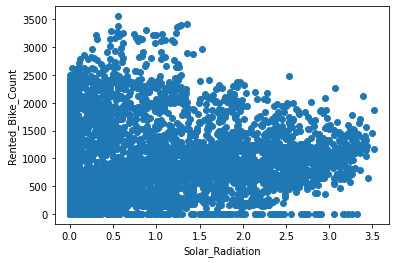

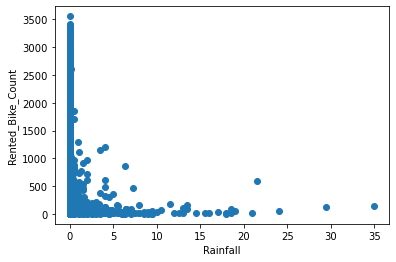

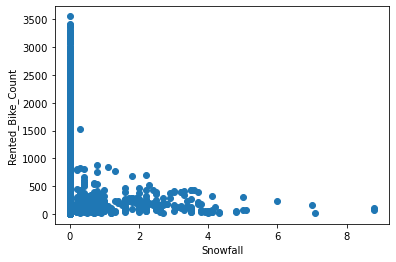

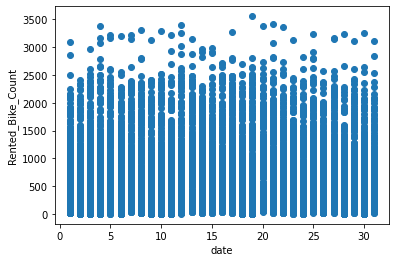

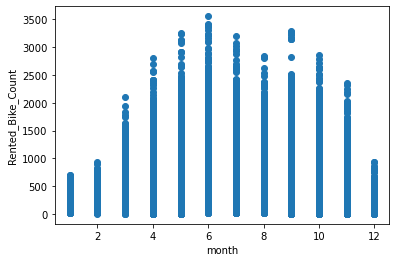

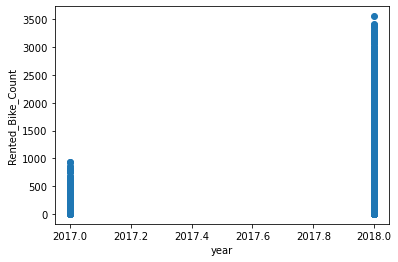

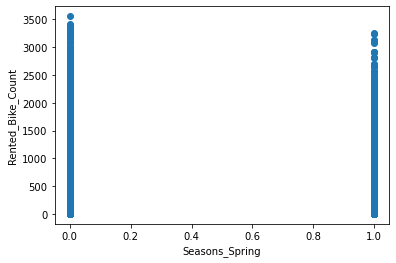

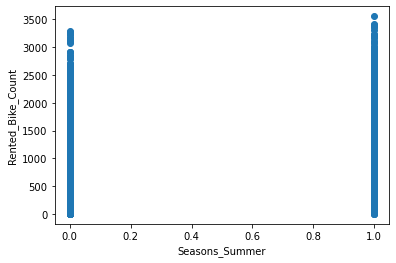

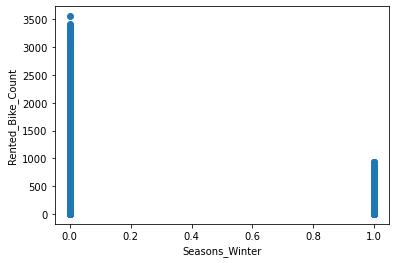

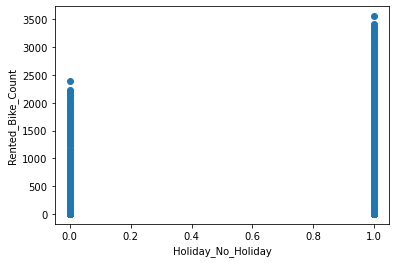

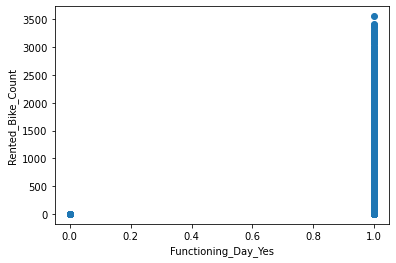

In [21]:
## Here we will compare the difference between All feature with Rented Bike Count

for feature in df.columns:
    if feature!='Rented_Bike_Count':
        data=df.copy()
        plt.scatter(data[feature],data['Rented_Bike_Count'])
        plt.xlabel(feature)
        plt.ylabel('Rented_Bike_Count')
        plt.show()

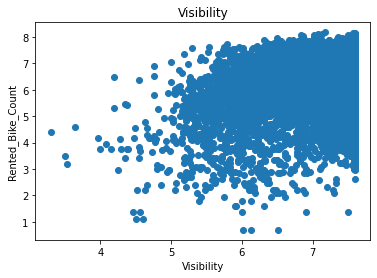

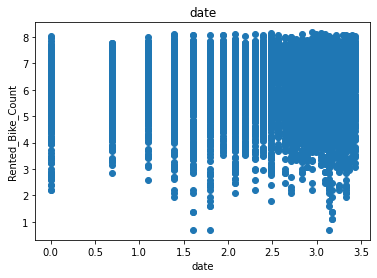

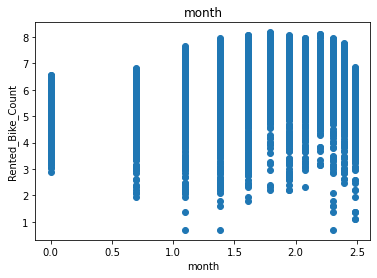

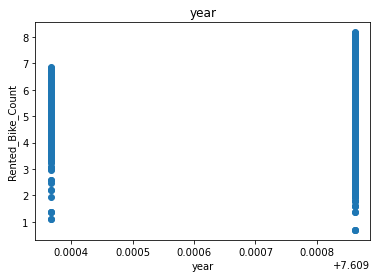

In [22]:
## We will be using logarithmic transformation


for feature in df.columns:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['Rented_Bike_Count']=np.log(data['Rented_Bike_Count'])
        plt.scatter(data[feature],data['Rented_Bike_Count'])
        plt.xlabel(feature)
        plt.ylabel('Rented_Bike_Count')
        plt.title(feature)
        plt.show()

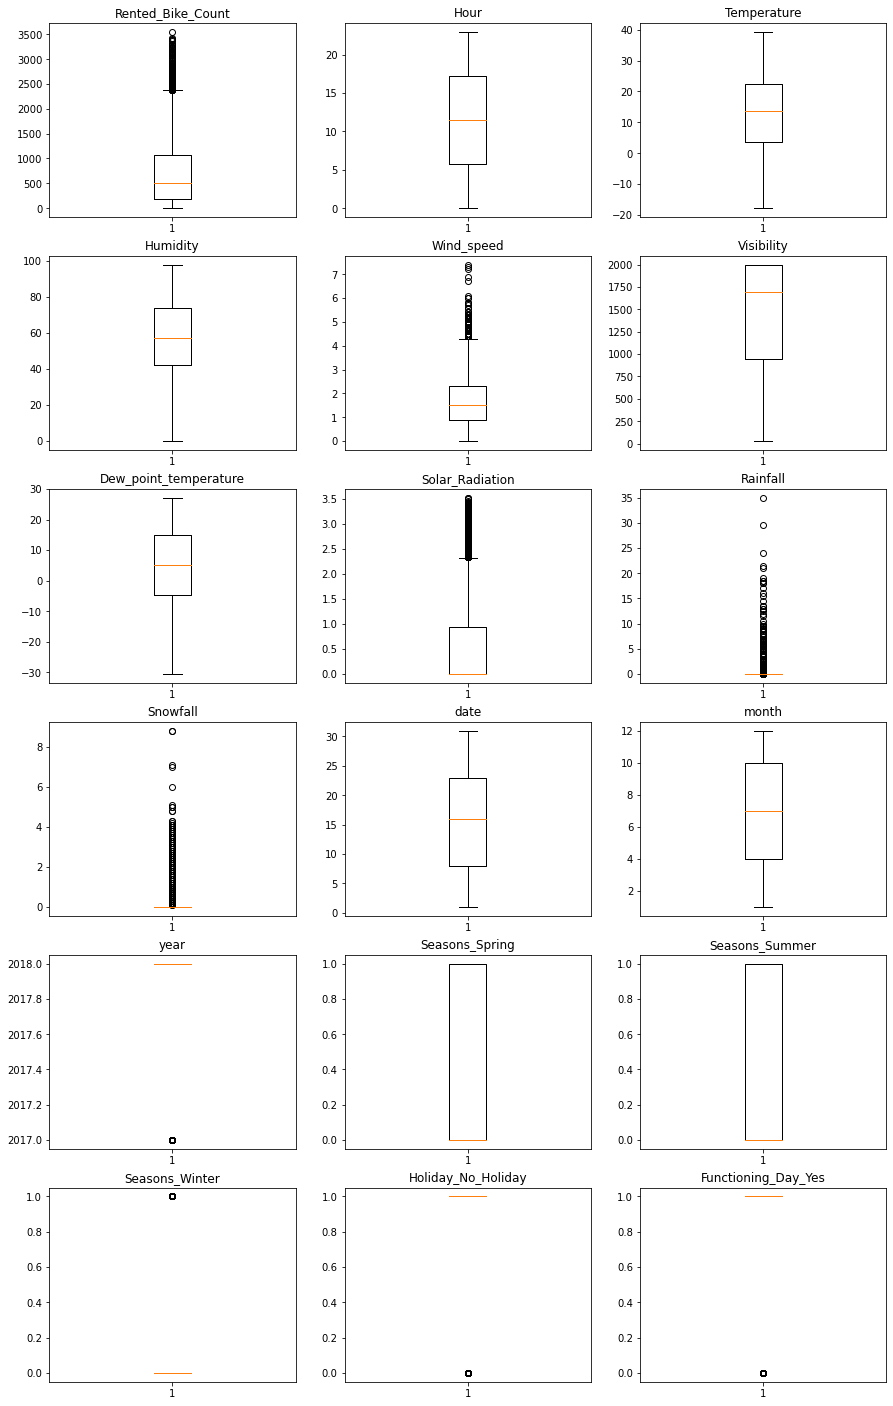

In [23]:
plt.figure(figsize = (15,25))
count = 1
for col in df:
    plt.subplot(6,3,count)
    plt.boxplot(df[col])
    plt.title(col)
    count += 1

plt.show()

In [24]:
df.drop(['date', 'month', 'year'], axis =1, inplace = True)

#### Removing the Outliers

In [25]:
df = df[(df["Wind_speed"]<4.2)]
df = df[(df["Solar_Radiation"]<2.2)]

#### Correlation Matrix

<AxesSubplot:>

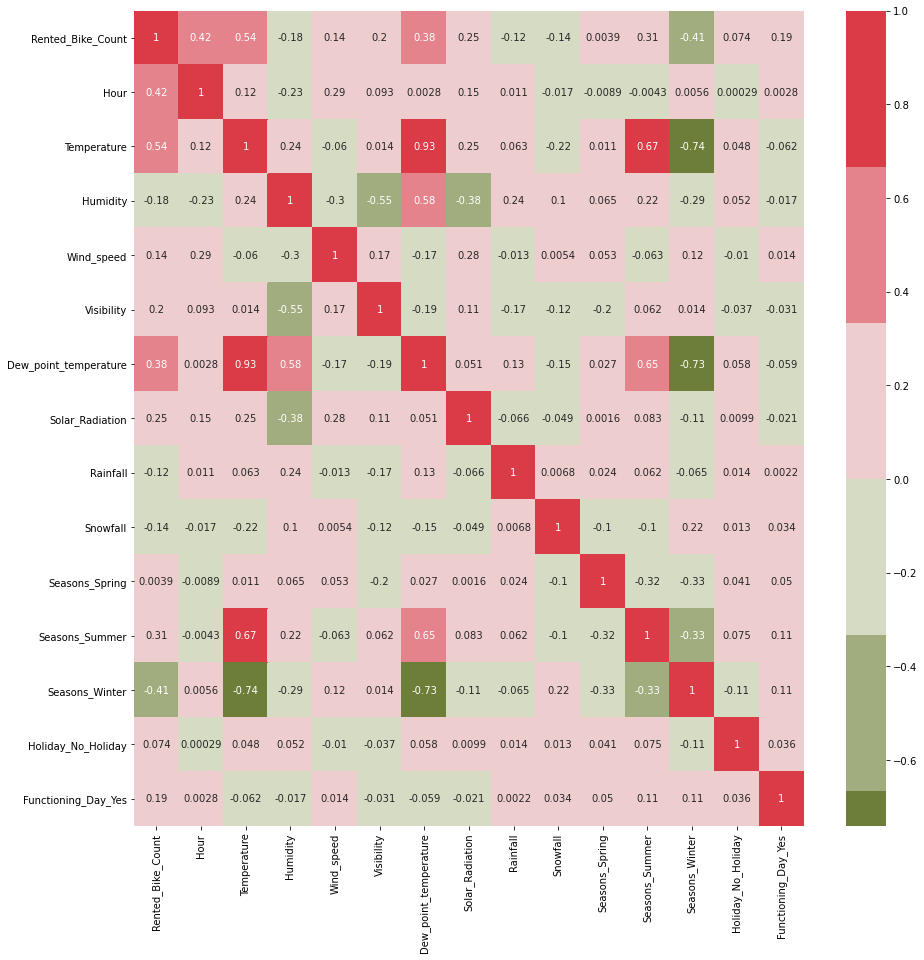

In [26]:
correlation = df.corr()
plt.figure(figsize = (15,15))
cmap= sns.diverging_palette(100, 10)
sns.heatmap(correlation, annot = True, cmap =cmap, center = 0)

#### Independent Features and Dependent Features

In [27]:
X = df.iloc[:, 1: ]
y = df.iloc[:, 0]

In [28]:
X.head()

,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No_Holiday,Functioning_Day_Yes
0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
1,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
2,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,0,1,1,1
3,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,0,1,1,1
4,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,0,1,1,1


In [29]:
y.head(9)

0    254
1    204
2    173
3    107
4     78
5    100
6    181
7    460
8    930
Name: Rented_Bike_Count, dtype: int64

#### Dividing records in training and testing sets with test size 20% of whole dataset

In [30]:
# Splitting in to Train and Test Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6257, 14) (1565, 14) (6257,) (1565,)


#### Model Building

In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [32]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [33]:
from sklearn.model_selection import RandomizedSearchCV

In [34]:
# Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
#maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [35]:
# create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [36]:
# Use the Random grid to search for best hyperparameters
# First Create the base model to tune
rf = RandomForestRegressor()

In [37]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [38]:
model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.4s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.2s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.1min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [40]:
model.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [41]:
model.best_score_

-57715.941898484016

In [42]:
y_pred = model.predict(X_test)

<AxesSubplot:xlabel='Rented_Bike_Count', ylabel='Density'>

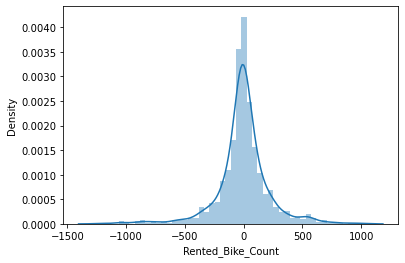

In [43]:
sns.distplot(y_test-y_pred)

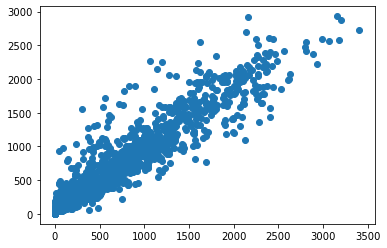

In [44]:
plt.scatter(y_test,y_pred)

In [45]:
print("R2 Score: ", r2_score(y_test, y_pred))

R2 Score:  0.8738265307859063


In [47]:
import pickle

# to store the data
file = open("Seoul_Bike_Sharing_Demand.pkl", "wb")

# dump information to that file
pickle.dump(model, file)